# Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

from pycocotools.coco import COCO

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
def plot_instances_classes(anns, catNames):
    # Visualize number of instances in the sampled images
    num_instances_sampled = dict()

    # Extract category ids from each annotation
    for i in range(len(anns)):
        temp_cat = anns[i]['category_id']
        num_instances_sampled[str(temp_cat)] = num_instances_sampled.get(str(temp_cat), 0) + 1

    # Sort by category id and plot
    num_instances_sampled_sorted = dict()
    names = []

    for i in catNames.keys():
        try:
            num_instances_sampled_sorted[str(i)] = num_instances_sampled[str(i)]
            names.append(catNames[str(i)])
        except KeyError:
           pass
        
    plt.figure()
    plt.bar(names, num_instances_sampled_sorted.values())
    plt.xticks(rotation=90)
    plt.show()

In [3]:
def plot_dataset(anns, catNames):
    # Visualize number of instances in the sampled images
    num_instances_sampled = dict()

    # Extract category ids from each annotation
    for i in range(len(anns)):
        temp_cat = anns[i]['category_id']
        num_instances_sampled[str(temp_cat)] = num_instances_sampled.get(str(temp_cat), 0) + 1

    # Sort by category id and plot
    num_instances_sampled_sorted = dict()
    names = []

    for i in catNames.keys():
        try:
            num_instances_sampled_sorted[str(i)] = num_instances_sampled[str(i)]
            names.append(catNames[str(i)])
        except KeyError:
           pass

    return names, num_instances_sampled_sorted.values()

In [4]:
def get_data(filename):
    annFile = "../annotations/" + filename

    # initialize COCO api for instance annotations
    coco=COCO(annFile)
    imgIds = coco.getImgIds()

    # load COCO categories and supercategories
    cats = coco.loadCats(coco.getCatIds())

    # Map category ids to names
    catIds = coco.getCatIds()

    cat_names = dict()
    for i in range(len(catIds)):
        cat_names[str(cats[i]['id'])] = cats[i]['name']

    # Load annotations
    annIds = coco.getAnnIds(imgIds)
    anns = coco.loadAnns(annIds)

    return anns, cat_names

loading annotations into memory...
Done (t=1.04s)
creating index...
index created!


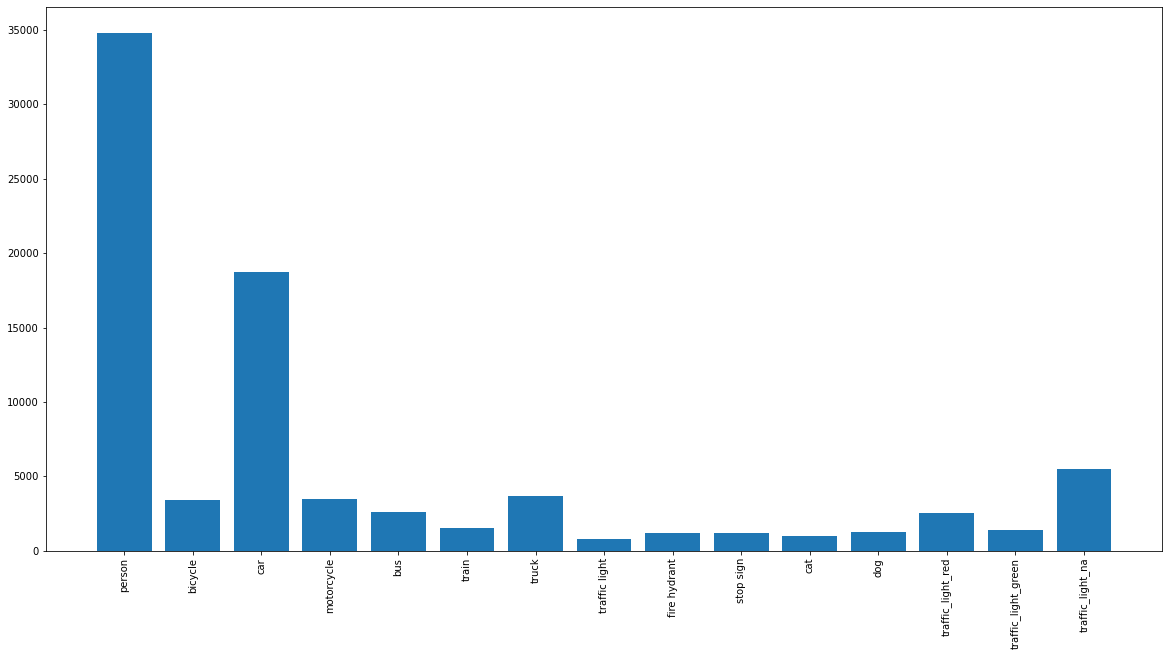

In [5]:
anns, cat_names = get_data("instances_trainTraffic.json")
plot_instances_classes(anns, cat_names)

# Full dataset
Before sampling

loading annotations into memory...
Done (t=1.15s)
creating index...
index created!


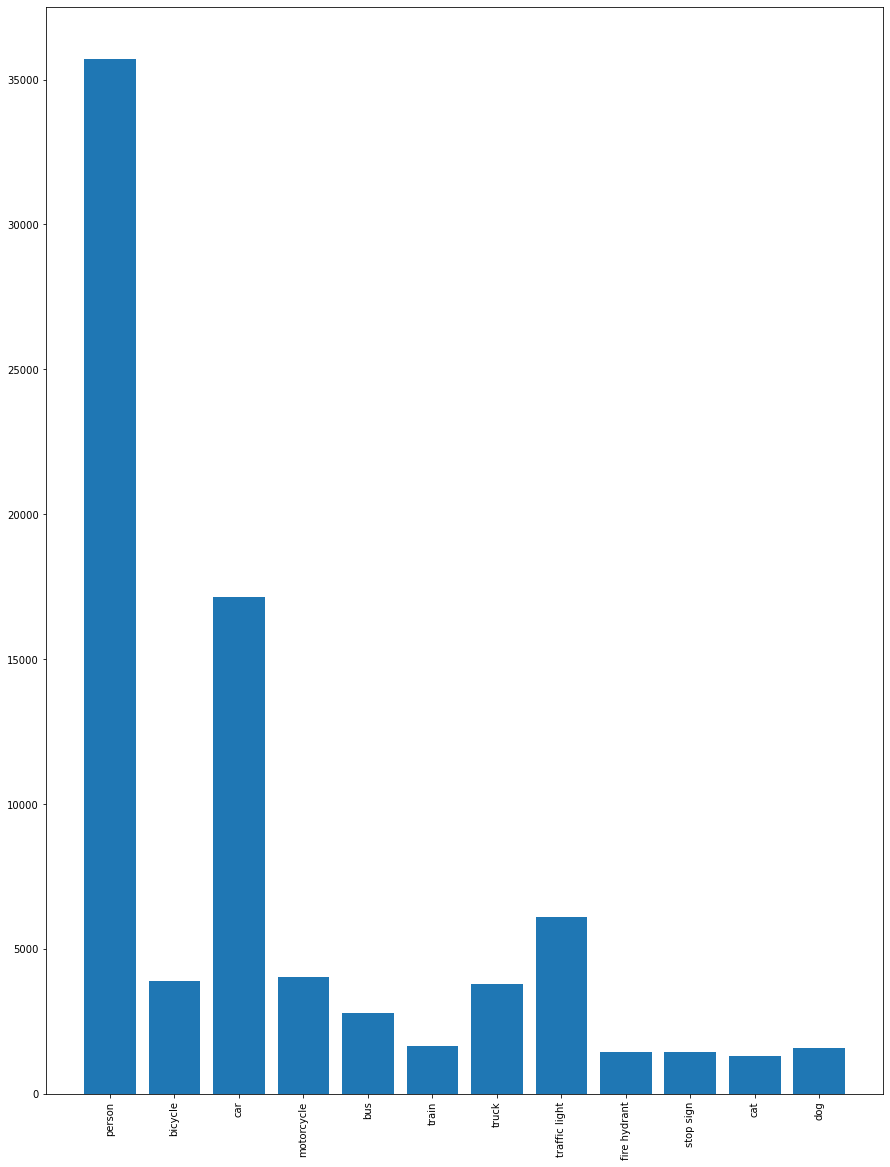

In [13]:
anns, cat_names = get_data("instances_traffic.json")
plot_instances_classes(anns, cat_names)

# Train and val set

loading annotations into memory...
Done (t=1.16s)
creating index...
index created!


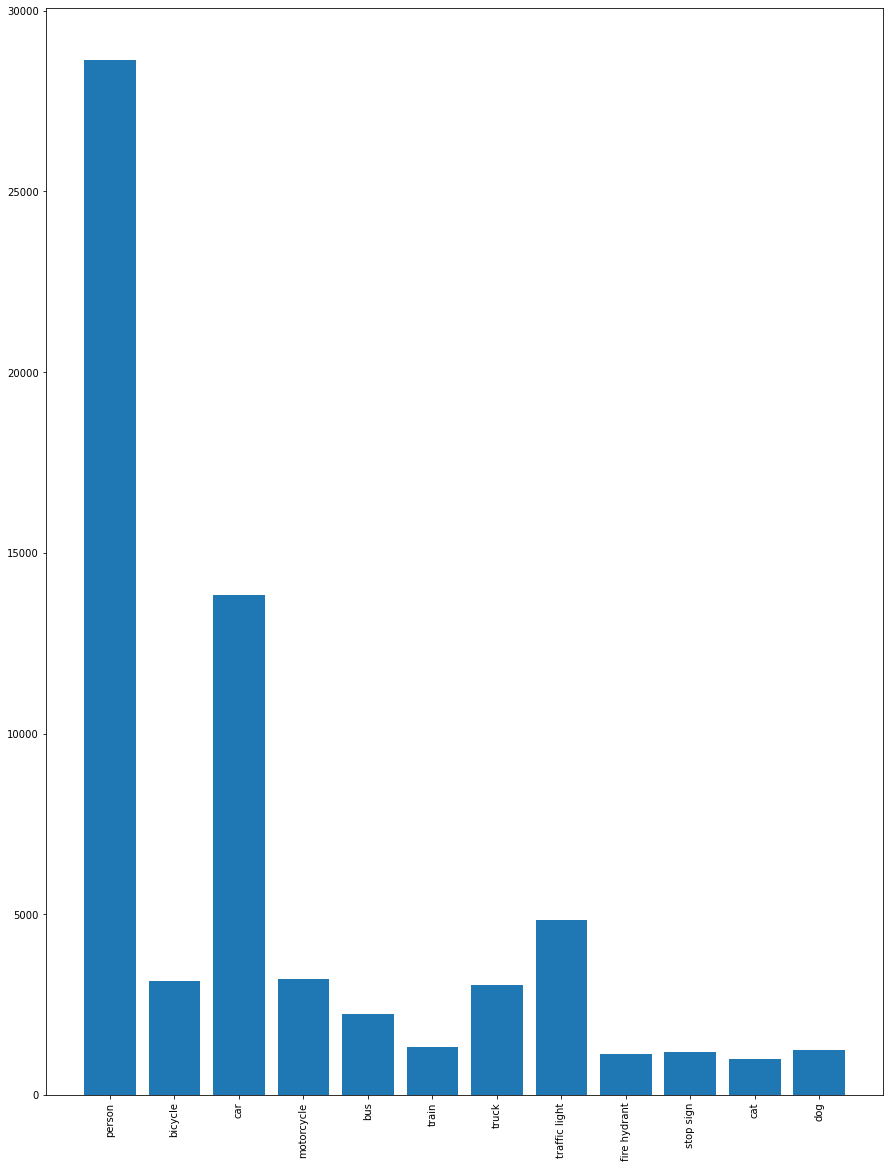

In [15]:
anns, cat_names = get_data("/split_before_relabelling/instances_trainTraffic.json")
plot_instances_classes(anns, cat_names)

loading annotations into memory...
Done (t=0.17s)
creating index...
index created!


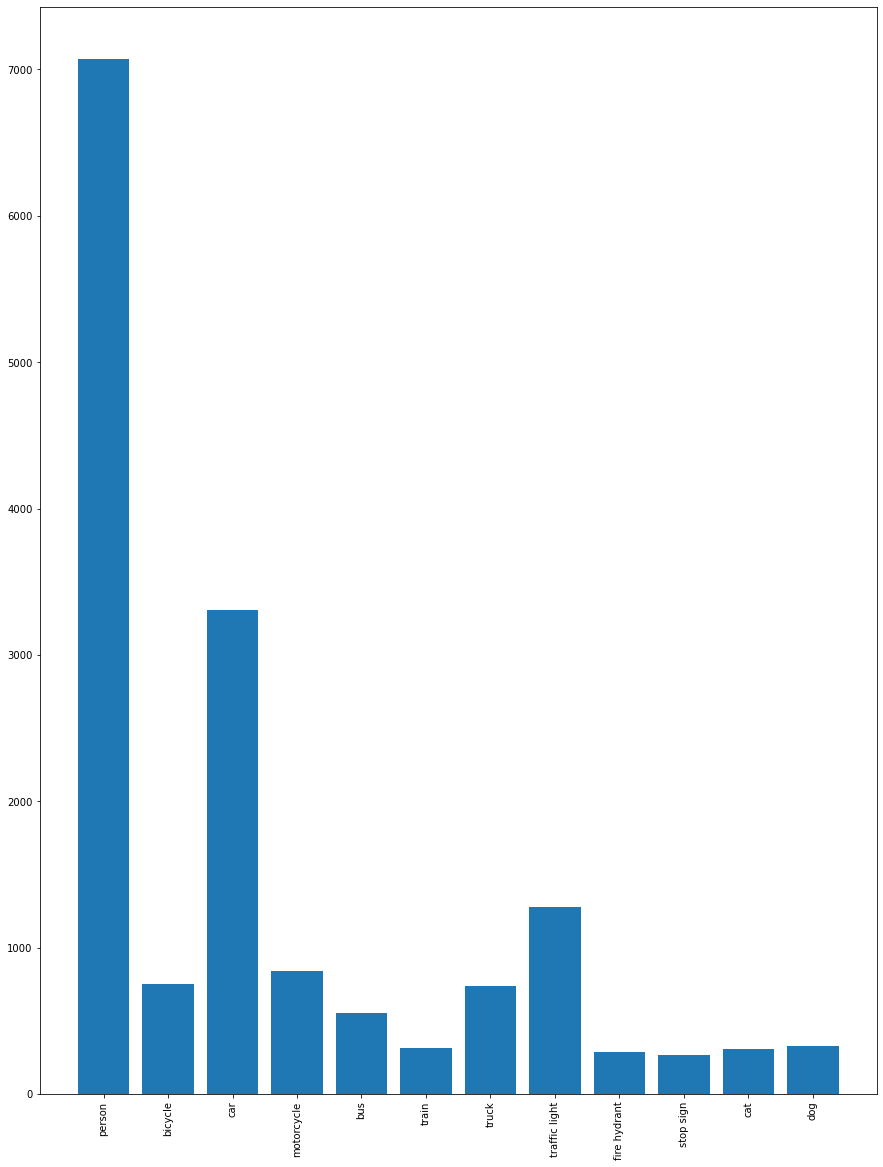

In [17]:
anns, cat_names = get_data("/split_before_relabelling/instances_valTraffic.json")
plot_instances_classes(anns, cat_names)

# Partially relabelled datasets

loading annotations into memory...
Done (t=1.11s)
creating index...
index created!


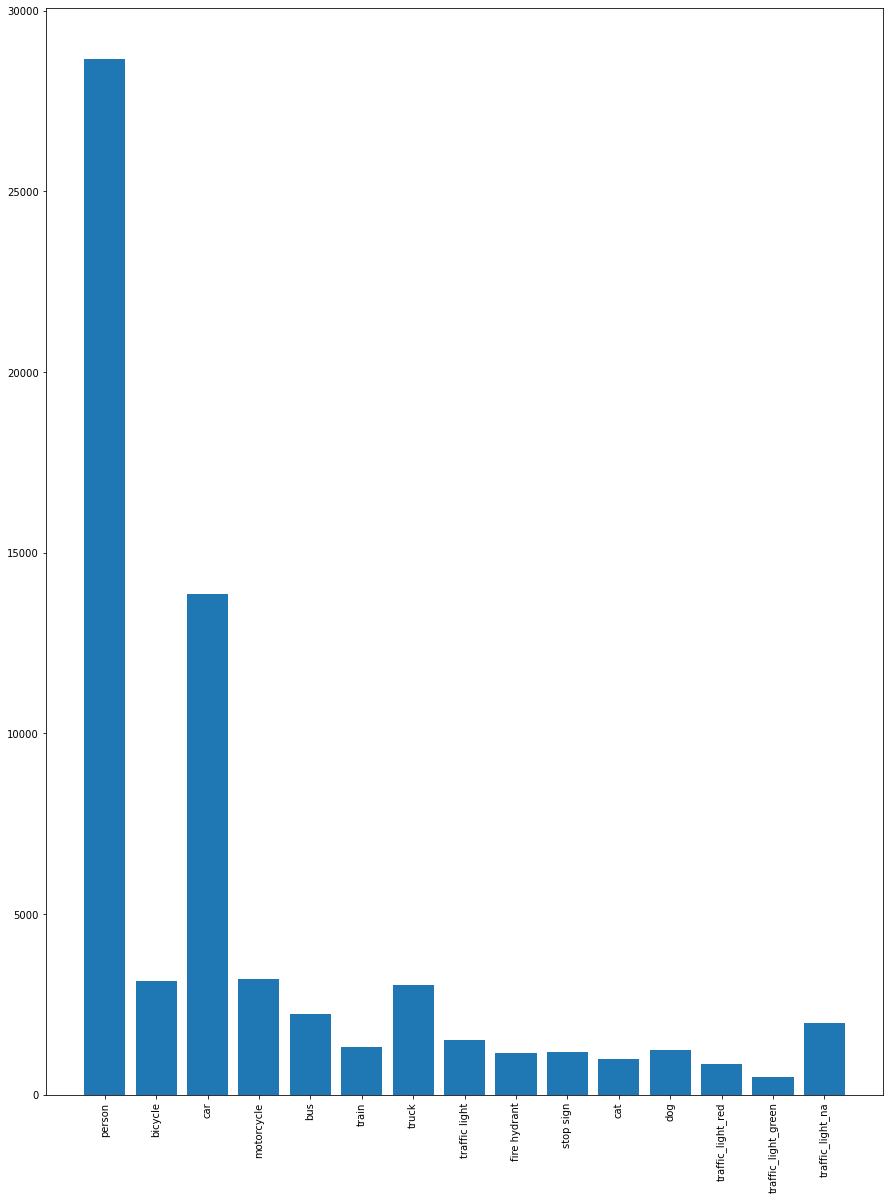

In [19]:
anns, cat_names = get_data("instances_trainTraffic-relabelled.json")
plot_instances_classes(anns, cat_names)

loading annotations into memory...
Done (t=0.17s)
creating index...
index created!


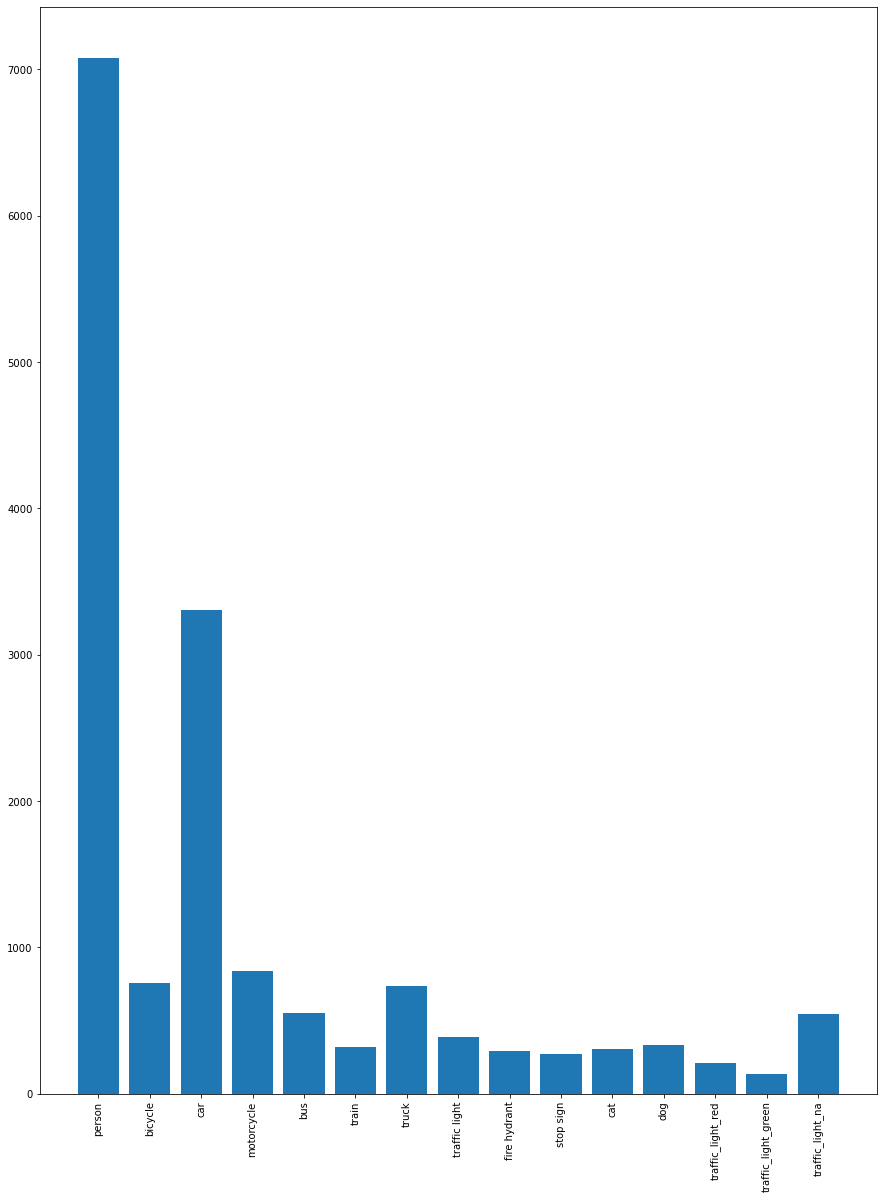

In [20]:
anns, cat_names = get_data("instances_valTraffic-relabelled.json")
plot_instances_classes(anns, cat_names)

# Final dataset

loading annotations into memory...
Done (t=0.99s)
creating index...
index created!


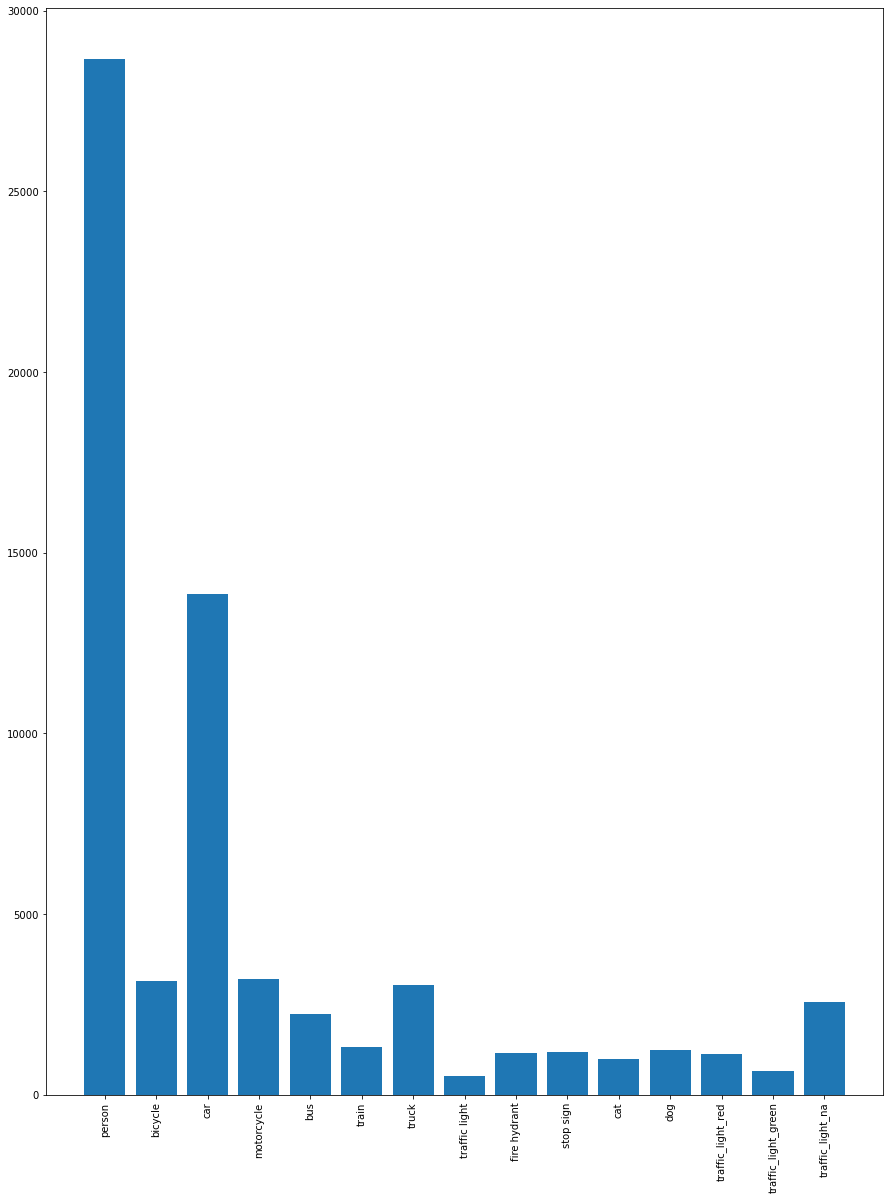

In [34]:
anns, cat_names = get_data("instances_trainTrafficRelabelled.json")
plot_instances_classes(anns, cat_names)

loading annotations into memory...
Done (t=0.15s)
creating index...
index created!


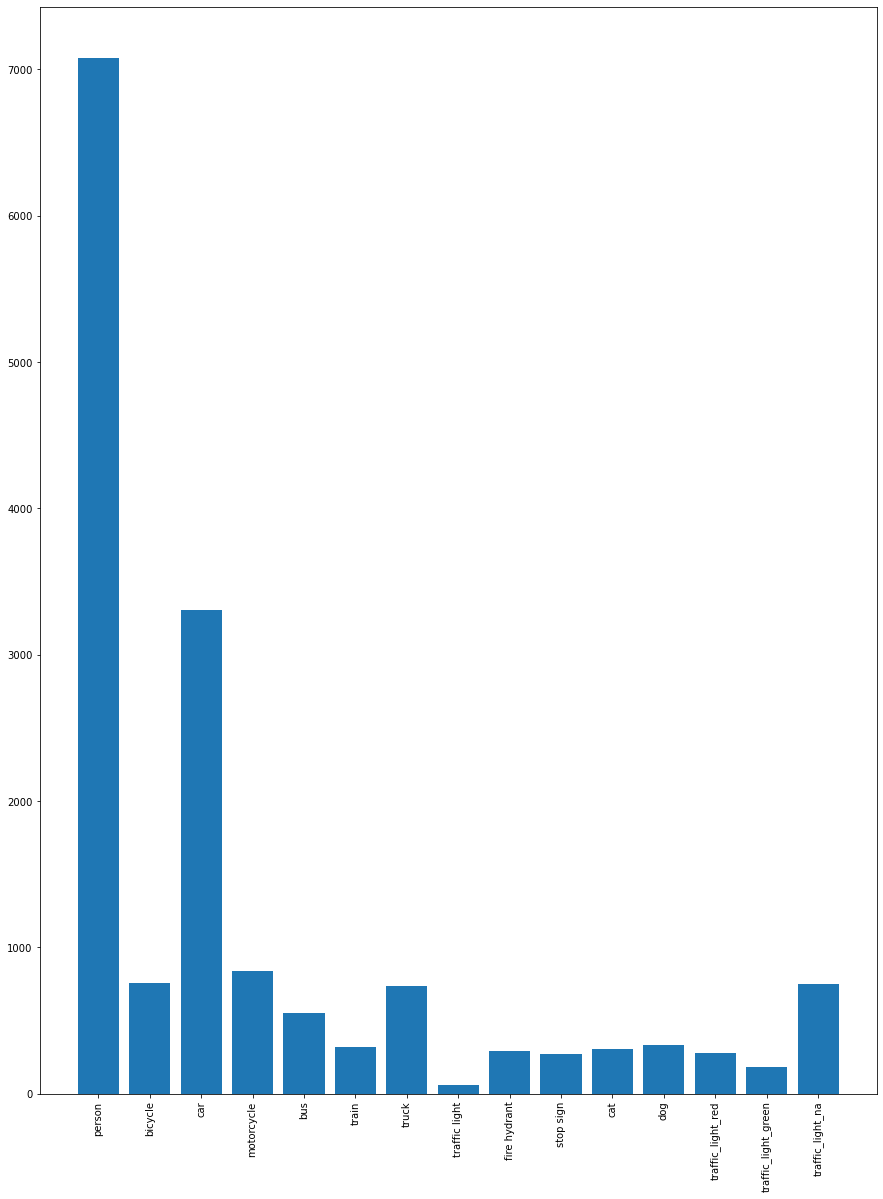

In [35]:
anns, cat_names = get_data("instances_valTrafficRelabelled.json")
plot_instances_classes(anns, cat_names)

In [6]:
anns_train, cat_names_train = get_data("instances_trainTraffic.json")
anns_val, cat_names_val = get_data("instances_valTraffic.json")

names_train, num_vals_train = plot_dataset(anns_train, cat_names_train)
names_val, num_vals_val = plot_dataset(anns_val, cat_names_val)

loading annotations into memory...
Done (t=1.13s)
creating index...
index created!
loading annotations into memory...
Done (t=0.21s)
creating index...
index created!


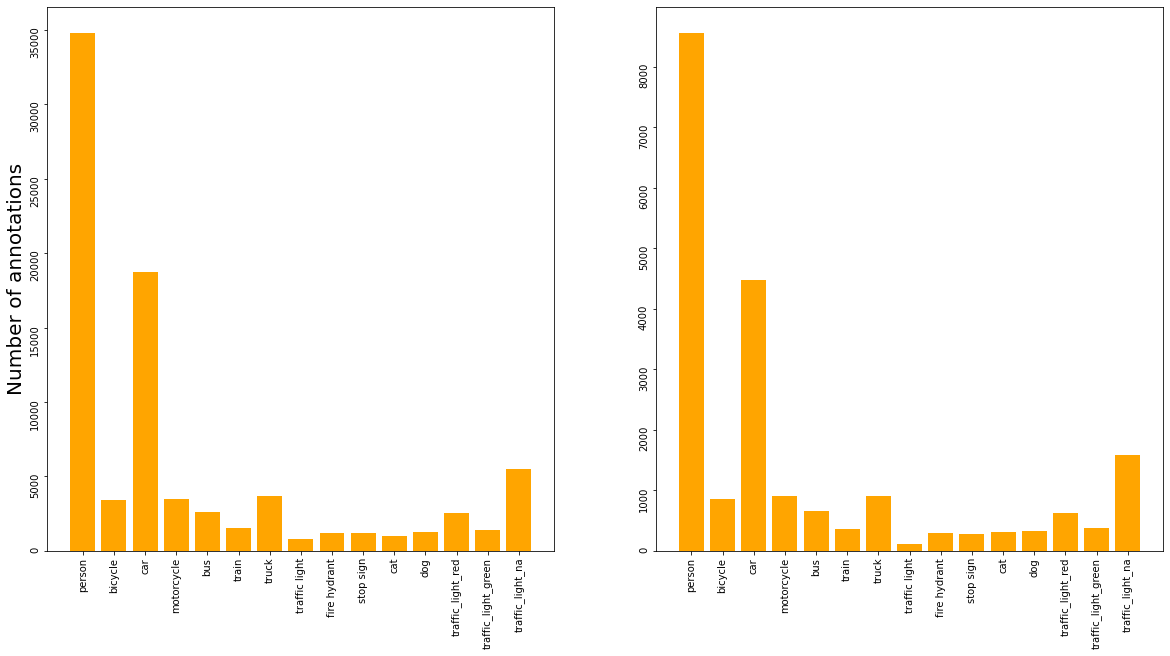

In [7]:
#plt.style.use('dark_background')

fig, (ax1, ax2) = plt.subplots(1, 2)

#fig.suptitle("Traffic dataset", color="white")
ax1.bar(names_train, num_vals_train, color="orange")
ax1.tick_params(labelrotation=90)
ax1.set_ylabel("Number of annotations", fontsize='20', color="black")
ax2.bar(names_val, num_vals_val, color="orange")
ax2.tick_params(labelrotation=90)
fig.savefig("Dataset.png", transparent=True)